Ce factori determinau preţul unui PC în vremea apariţiei acestora? Fişierul Prices.csv descrie un eşantion de 500 de vânzări de PC, colectat din 1993 până în 1995 în Statele Unite. Pe lângă preţul de vânzare, au fost colectate informaţii despre frecvenţa procesorului în MHz, dimensiunea hard diskului în MB, dimensiunea
Ram în MB şi dacă producătorul este premium (de exemplu, IBM, COMPAQ). Să presupunem că se ia în
considerare modelul de regresie $y ∼ N (μ, σ)$, unde

$$μ = α + β1x1 + β2x2,$$

y este preţul de vânzare, x1 este frecvenţa procesorului şi x2 este logaritmul (natural) al mărimii hard diskului.

1. Folosind distribuţii a priori slab informative asupra parametrilor α, β1, β2 şi σ, folosiţi PyMC pentru a
simula un eşantion suficient de mare din distribuţia a posteriori.

In [ ]:
!pip install arviz

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Prices.csv to Prices.csv


Output()

Output()

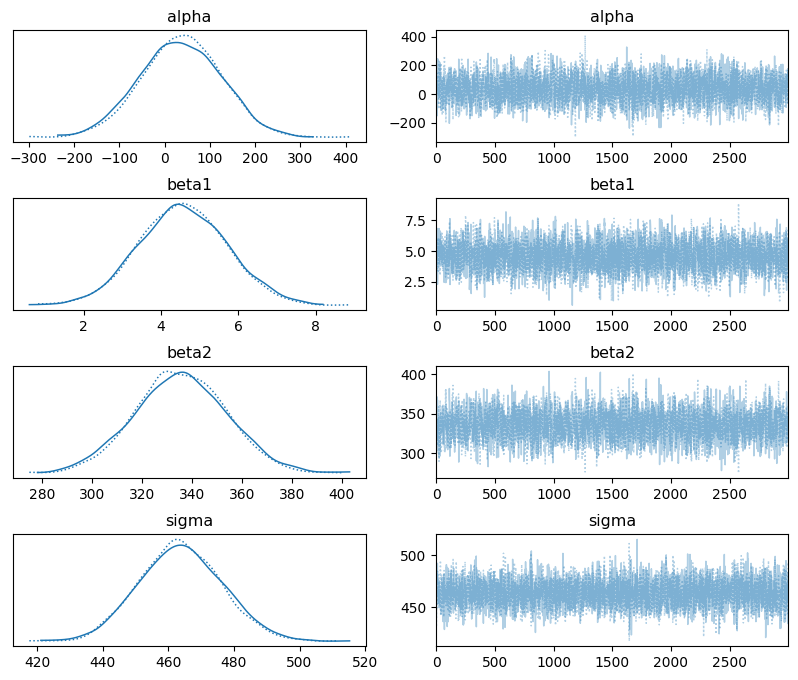

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha   35.98  88.22 -135.73   193.30       1.66     1.18   2815.20   2991.42   
beta1    4.56   1.13    2.46     6.73       0.02     0.01   3381.28   3500.18   
beta2  335.67  18.23  302.06   370.29       0.37     0.26   2423.16   2693.38   
sigma  463.74  12.48  440.78   487.15       0.21     0.15   3632.03   3662.08   

       r_hat  
alpha    1.0  
beta1    1.0  
beta2    1.0  
sigma    1.0  


In [42]:
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

data = pd.read_csv('Prices.csv')

y = data['Price']
x1 = data['Speed']
x2 = np.log(data['HardDrive'])


with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    beta1 = pm.Normal('beta1', mu=0, sigma=100)
    beta2 = pm.Normal('beta2', mu=0, sigma=100)
    sigma = pm.HalfNormal('sigma', sigma=50)

    mu = alpha + beta1 * x1 + beta2 * x2

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(3000, return_inferencedata=True)


fig, axes = plt.subplots(len(trace.posterior.keys()), 2, figsize=(10, 8))
az.plot_trace(trace, axes=axes)

plt.subplots_adjust(hspace=0.5)
plt.show()

summary = az.summary(trace, round_to=2)
print(summary)


2. Obţineţi estimări de 95% HDI ale parametrilor β1 şi β2.

In [43]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

data = pd.read_csv('Prices.csv')

y = data['Price']
x1 = data['Speed']
x2 = np.log(data['HardDrive'])


with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    mu = alpha + beta1 * x1 + beta2 * x2

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True)


hdi_beta1 = az.hdi(trace.posterior['beta1'], hdi_prob=0.95)
hdi_beta2 = az.hdi(trace.posterior['beta2'], hdi_prob=0.95)

print("95% HDI pt beta1:", hdi_beta1.values)
print("95% HDI pt beta2:", hdi_beta2.values)


Output()

Output()

95% HDI pt beta1: <bound method Mapping.values of <xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    beta1    (hdi) float64 16B 14.26 16.93>
95% HDI pt beta2: <bound method Mapping.values of <xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    beta2    (hdi) float64 16B 212.3 236.8>


3. Pe baza rezultatelor obţinute, sunt frecvenţa procesorului şi mărimea hard diskului predictori utili ai preţului de vânzare?

In [44]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

data = pd.read_csv('Prices.csv')

y = data['Price']
x1 = data['Speed']
x2 = np.log(data['HardDrive'])


with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    mu = alpha + beta1 * x1 + beta2 * x2

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True)


hdi_beta1 = az.hdi(trace.posterior['beta1'], hdi_prob=0.95)
hdi_beta2 = az.hdi(trace.posterior['beta2'], hdi_prob=0.95)

hdi_beta1_min = hdi_beta1.sel(hdi='lower')['beta1'].values.item()
hdi_beta1_max = hdi_beta1.sel(hdi='higher')['beta1'].values.item()
hdi_beta2_min = hdi_beta2.sel(hdi='lower')['beta2'].values.item()
hdi_beta2_max = hdi_beta2.sel(hdi='higher')['beta2'].values.item()

print("95% HDI pt beta1 (Speed):", hdi_beta1_min, hdi_beta1_max)
print("95% HDI pt beta2 (HardDrive):", hdi_beta2_min, hdi_beta2_max)

if hdi_beta1_min > 0 and hdi_beta1_max > 0:
    print("Speed e predicator util pt pret.")
else:
    print("Spees nu e predicator util pt pret.")

if hdi_beta2_min > 0 and hdi_beta2_max > 0:
    print("HardDrive e predicator util pt pret.")
else:
    print("HardDrive nu e predicator util pt pret.")

Output()

Output()

95% HDI pt beta1 (Speed): 14.275662672972663 16.927255281961088
95% HDI pt beta2 (HardDrive): 212.55778364781747 237.46766895802995
Speed e predicator util pt pret.
HardDrive e predicator util pt pret.


4. Să presupunem acum că un consumator este interesat de un computer cu o frecvenţă de 33 MHz şi un
hard disk de 540 MB. Simulaţi 5000 de extrageri din preţul de vânzare aşteptat (μ) şi construiţi un interval de 90% HDI pentru acest preţ.

In [48]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

data = pd.read_csv('Prices.csv')

y = data['Price']
x1 = data['Speed']
x2 = np.log(data['HardDrive'])


with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    mu = alpha + beta1 * x1 + beta2 * x2

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True)


alpha_samples = trace.posterior['alpha'].values.flatten()
beta1_samples = trace.posterior['beta1'].values.flatten()
beta2_samples = trace.posterior['beta2'].values.flatten()

x1_new = 33
x2_new = np.log(540)

mu_samples = alpha_samples + beta1_samples * x1_new + beta2_samples * x2_new

hdi_mu = az.hdi(mu_samples, hdi_prob=0.90)

print(f"Intervalul HDI de 90% pt pretul de vanzare estimat: {hdi_mu}")

Output()

Output()

Intervalul HDI de 90% pt pretul de vanzare estimat: [1934.05894261 2003.59164136]


5. În schimb, să presupunem că acest consumator doreşte să prezică preţul de vânzare al unui computer cu această frecvenţă şi mărime a hard disk-ului. Simulaţi 5000 de extrageri din distribuţia predictivă posterioară şi utilizaţi aceste extrageri simulate pentru a găsi un interval de predicţie de 90% HDI.


In [49]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

data = pd.read_csv('Prices.csv')

y = data['Price']
x1 = data['Speed']
x2 = np.log(data['HardDrive'])

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    mu = alpha + beta1 * x1 + beta2 * x2

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True)

alpha_samples = trace.posterior['alpha'].values.flatten()
beta1_samples = trace.posterior['beta1'].values.flatten()
beta2_samples = trace.posterior['beta2'].values.flatten()
sigma_samples = trace.posterior['sigma'].values.flatten()

x1_new = 33
x2_new = np.log(540)

mu_samples = alpha_samples + beta1_samples * x1_new + beta2_samples * x2_new

y_new_samples = np.random.normal(mu_samples, sigma_samples)

hdi_y_new = az.hdi(y_new_samples, hdi_prob=0.90)

print(f"Intervalul de predictie de 90% HDI pt pretul de vanzare estimat: {hdi_y_new}")


Output()

Output()

Intervalul de predictie de 90% HDI pt pretul de vanzare estimat: [1401.7474017  2456.21262123]


6. Afectează în vreun fel preţul faptul că producătorul este premium? Justificaţi.

In [50]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

data = pd.read_csv('Prices.csv')

y = data['Price']
x1 = data['Speed']
x2 = np.log(data['HardDrive'])
x3 = (data['Premium'] == 'yes').astype(int)


with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta1 = pm.Normal('beta1', mu=0, sigma=10)
    beta2 = pm.Normal('beta2', mu=0, sigma=10)
    beta3 = pm.Normal('beta3', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    mu = alpha + beta1 * x1 + beta2 * x2 + beta3 * x3

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(2000, return_inferencedata=True)


alpha_samples = trace.posterior['alpha'].values.flatten()
beta1_samples = trace.posterior['beta1'].values.flatten()
beta2_samples = trace.posterior['beta2'].values.flatten()
beta3_samples = trace.posterior['beta3'].values.flatten()

hdi_beta3 = az.hdi(beta3_samples, hdi_prob=0.90)

print(f"Intervalul HDI de 90% pt coeficientul Premium: {hdi_beta3}")


Output()

Output()

Intervalul HDI de 90% pt coeficientul Premium: [ 3.74947654 35.54734205]
